In [1]:
#Titanic Survival Analysis: Exploratory Data Analysis and Predictive Modeling
#Introduction
#This Jupyter notebook performs a comprehensive exploratory data analysis (EDA) of the Titanic dataset, focusing on uncovering survival patterns among passengers. We'll analyze passenger demographics, handle missing data and outliers, perform feature engineering, and visualize survival rates based on age, gender, and ticket class.

In [2]:
#1. Setup and Data Loading

#First, let's import the necessary libraries and load the dataset.

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

# Load the dataset
titanic = pd.read_csv(r'C:\Users\hshek\Desktop\DATASETS\Titanic-Dataset.csv')  # Assuming the file is named 'Titanic-Dataset.csv'

# Display basic information
print(titanic.info())
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#2. Data Cleaning and Preprocessing

#2.1 Handling Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


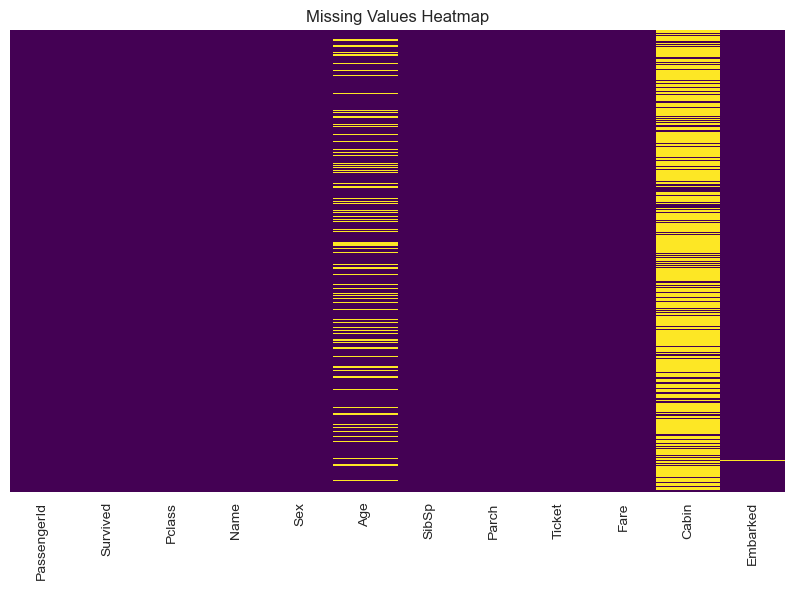

In [5]:
# Check for missing values

print(titanic.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
#2.2 Imputing Missing Values


# Age: Fill missing values with median age grouped by Pclass and Sex
titanic['Age'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Embarked: Fill the 2 missing values with the most common embarkation point
most_common_embarked = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(most_common_embarked)

# Cabin: Too many missing values, we'll drop this column
titanic.drop('Cabin', axis=1, inplace=True)

# Verify no more missing values
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


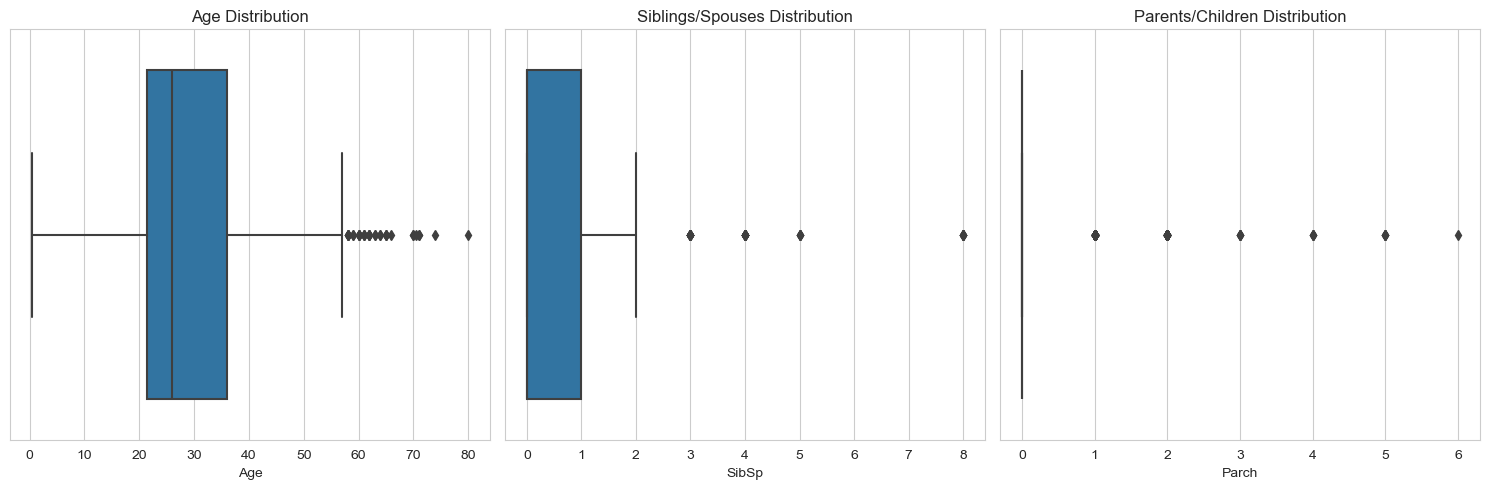

In [7]:
#2.3 Handling Outliers


# Visualize numerical features for outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Age', data=titanic)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(x='SibSp', data=titanic)
plt.title('Siblings/Spouses Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(x='Parch', data=titanic)
plt.title('Parents/Children Distribution')

plt.tight_layout()
plt.show()

# Handle outliers in Age (cap at 99th percentile)
age_upper_limit = titanic['Age'].quantile(0.99)
titanic['Age'] = titanic['Age'].clip(upper=age_upper_limit)

# Handle outliers in SibSp (cap at 3)
titanic['SibSp'] = titanic['SibSp'].clip(upper=3)

# Handle outliers in Parch (cap at 2)
titanic['Parch'] = titanic['Parch'].clip(upper=2)

In [8]:
#3. Exploratory Data Analysis (EDA)
#3.1 Basic Statistics

# Survival rate overall
survival_rate = titanic['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

# Survival rate by gender
print("\nSurvival rate by gender:")
print(titanic.groupby('Sex')['Survived'].mean())

# Survival rate by passenger class
print("\nSurvival rate by passenger class:")
print(titanic.groupby('Pclass')['Survived'].mean())

Overall survival rate: 38.38%

Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


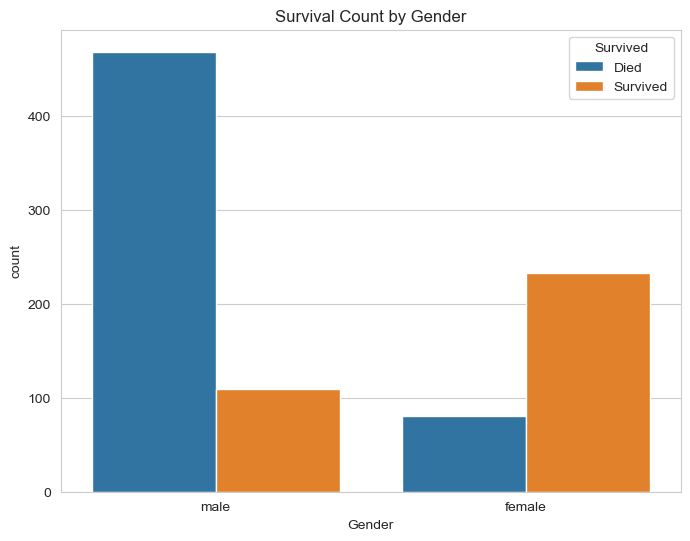

In [9]:
#3.2 Visualization of Key Features
#3.2.1 Survival by Gender

plt.figure(figsize=(8, 6))
# Convert Survived to strings or categorical
titanic['Survived'] = titanic['Survived'].map({0: 'Died', 1: 'Survived'})
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.show()

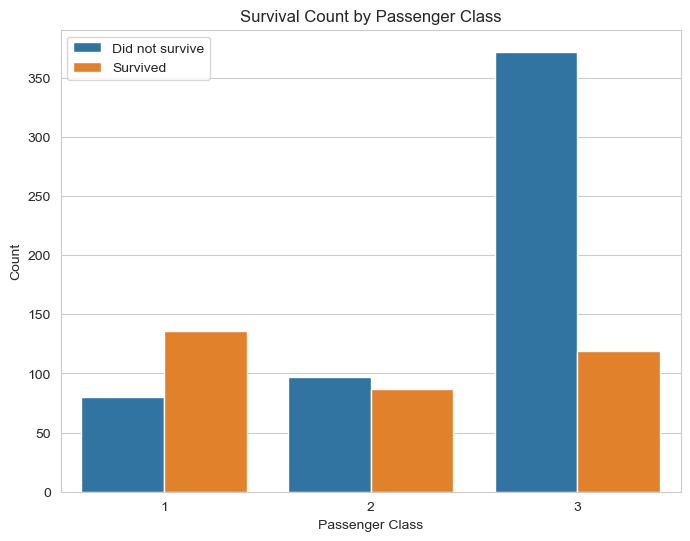

In [10]:
#3.2.2 Survival by Passenger Class

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

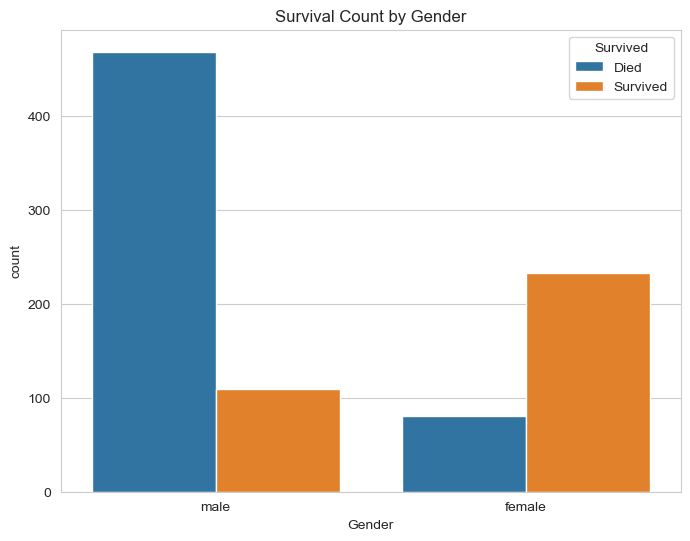

In [11]:
#3.2.3 Survival by Age

import numpy as np

# Convert inf/-inf values to NaN in your DataFrame
titanic = titanic.replace([np.inf, -np.inf], np.nan)

# Then proceed with your plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.show()

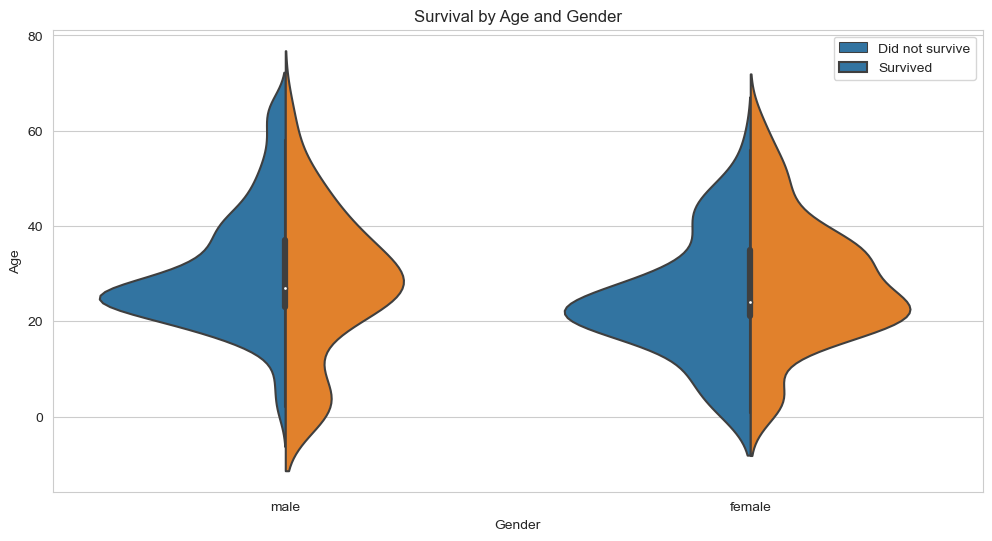

In [12]:
#3.2.4 Survival by Age and Gender


plt.figure(figsize=(12, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic, split=True)
plt.title('Survival by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(['Did not survive', 'Survived'])
plt.show()

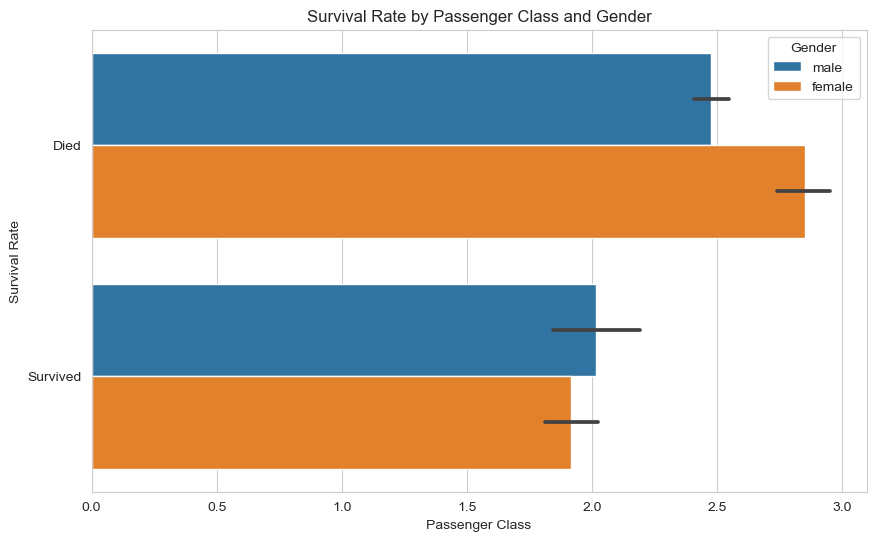

In [13]:
#3.2.5 Survival by Passenger Class and Gender

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

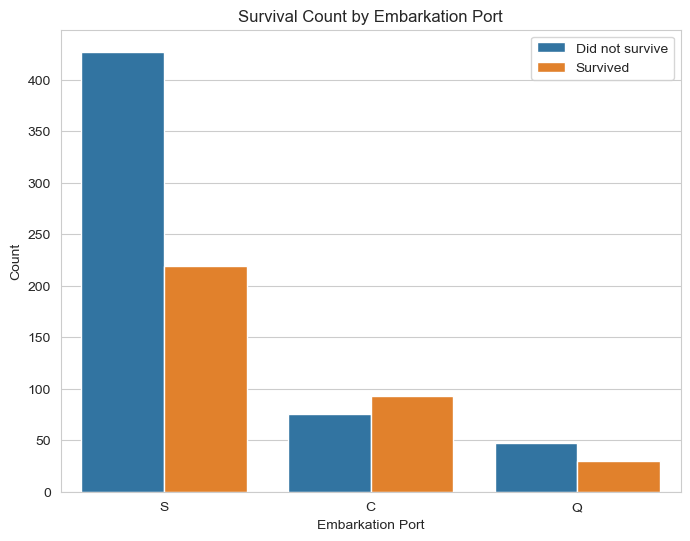

In [14]:
#3.2.6 Survival by Embarkation Port


plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

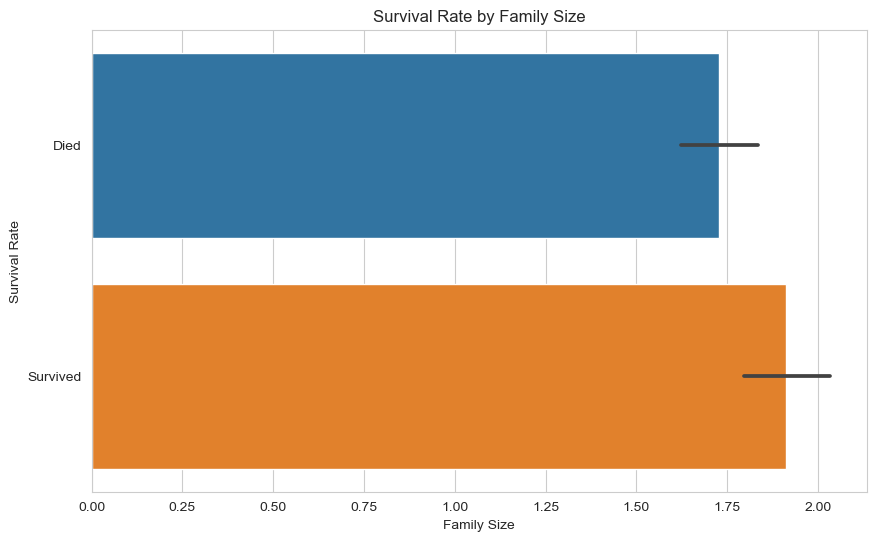

In [15]:
#3.2.7 Survival by Family Size


# Create a new feature: Family Size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [16]:
#4. Feature Engineering

# Create age groups
titanic['AgeGroup'] = pd.cut(titanic['Age'], 
                             bins=[0, 12, 18, 30, 50, 100], 
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Create fare groups
titanic['FareGroup'] = pd.qcut(titanic['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create title feature from name
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

# Create is_alone feature
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

# Convert categorical features to numerical
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Title', 'AgeGroup', 'FareGroup'], drop_first=True)

# Drop unnecessary columns
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display the engineered dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,FareGroup_Medium,FareGroup_High,FareGroup_Very High
0,Died,3,0,22.0,1,0,7.2500,2,0,False,...,True,False,False,False,True,False,False,False,False,False
1,Survived,1,1,38.0,1,0,71.2833,2,0,False,...,False,True,False,False,False,True,False,False,False,True
2,Survived,3,1,26.0,0,0,7.9250,1,1,False,...,False,False,False,False,True,False,False,True,False,False
3,Survived,1,1,35.0,1,0,53.1000,2,0,False,...,False,True,False,False,False,True,False,False,False,True
4,Died,3,0,35.0,0,0,8.0500,1,1,False,...,True,False,False,False,False,True,False,True,False,False


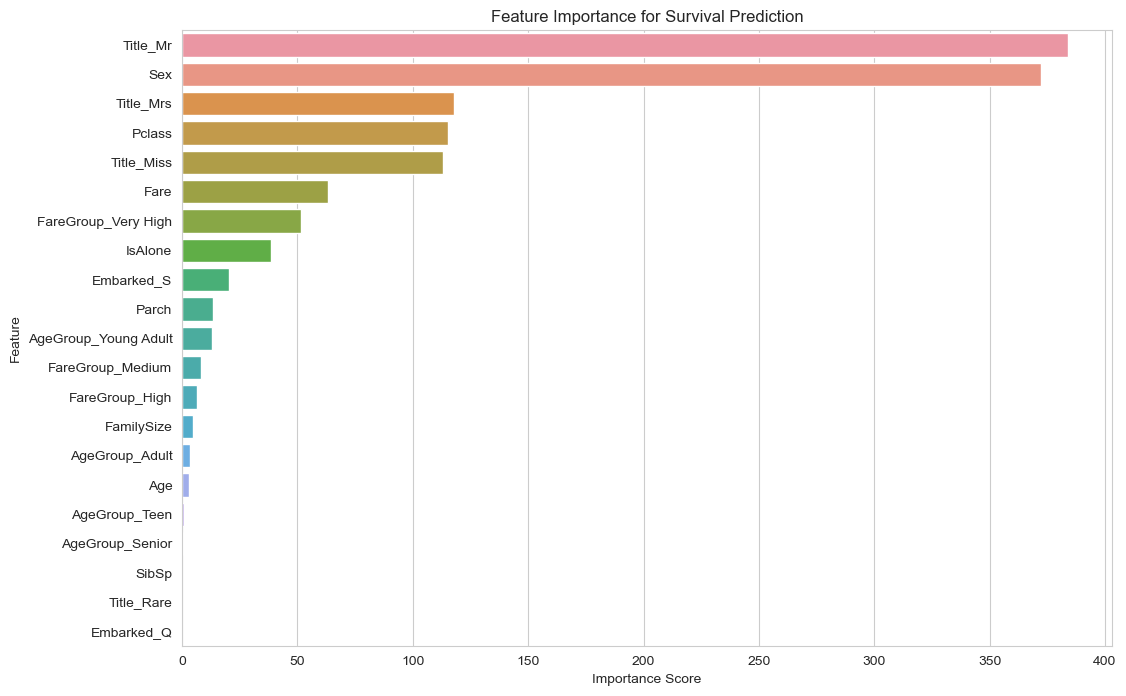

In [17]:
#5. Feature Importance Analysis


# Separate features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': selector.scores_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Survival Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

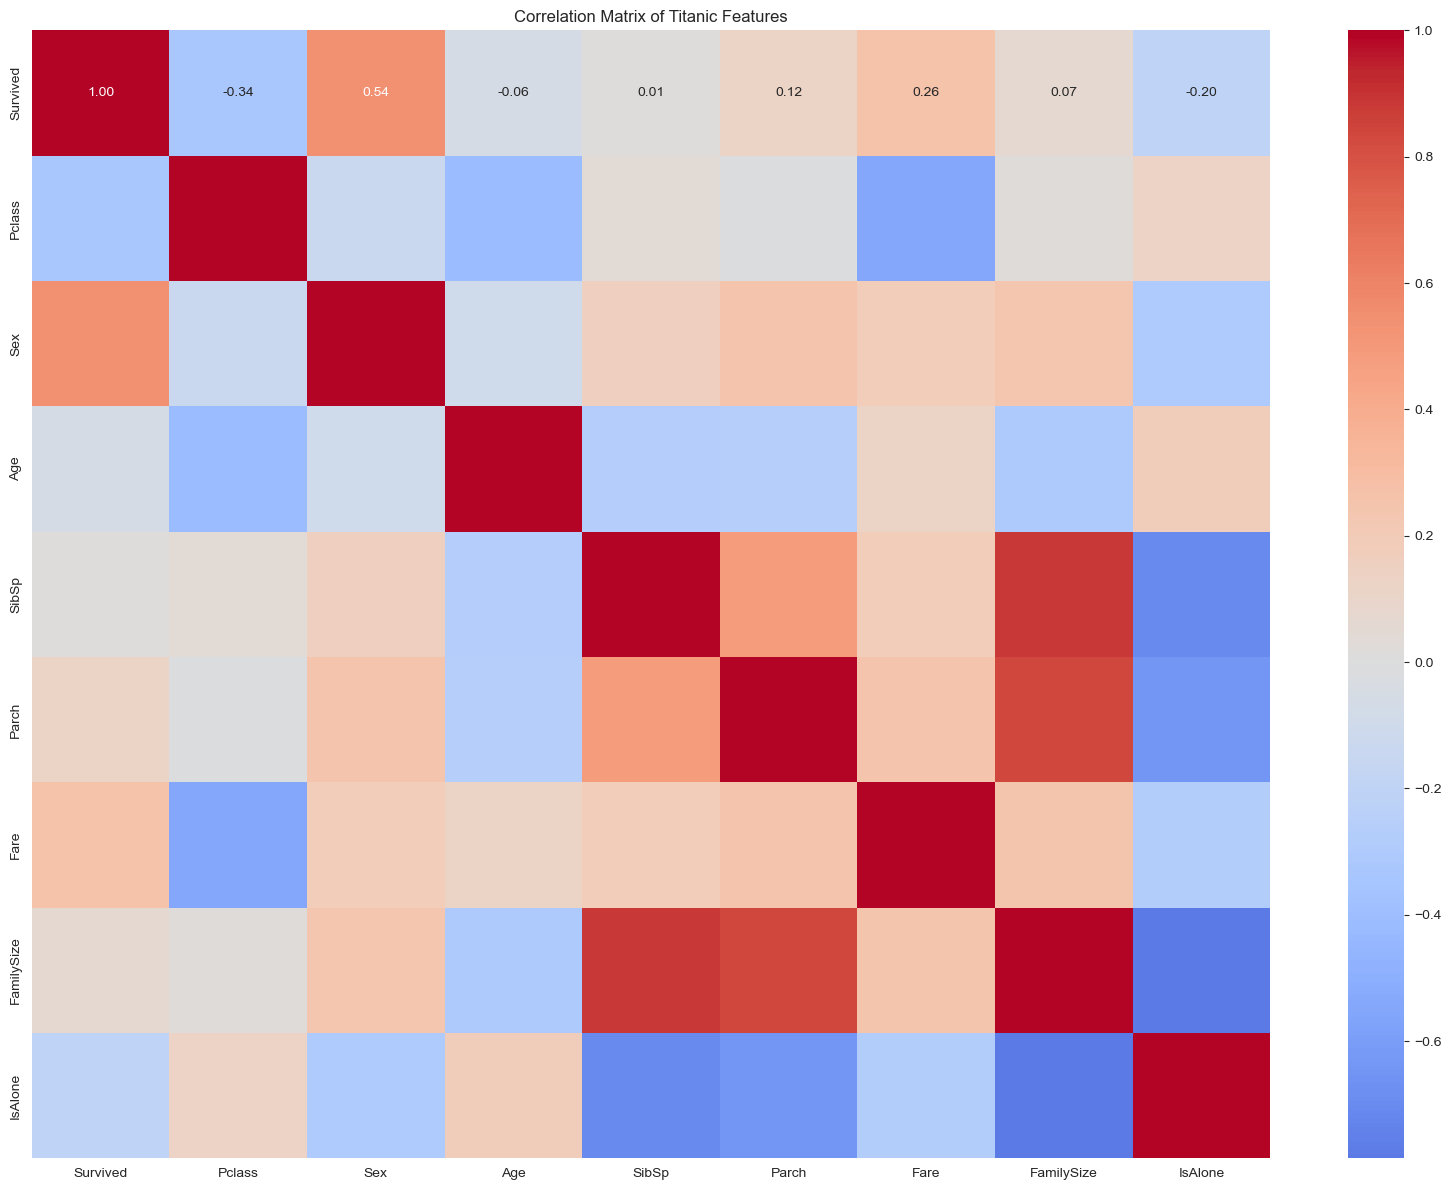

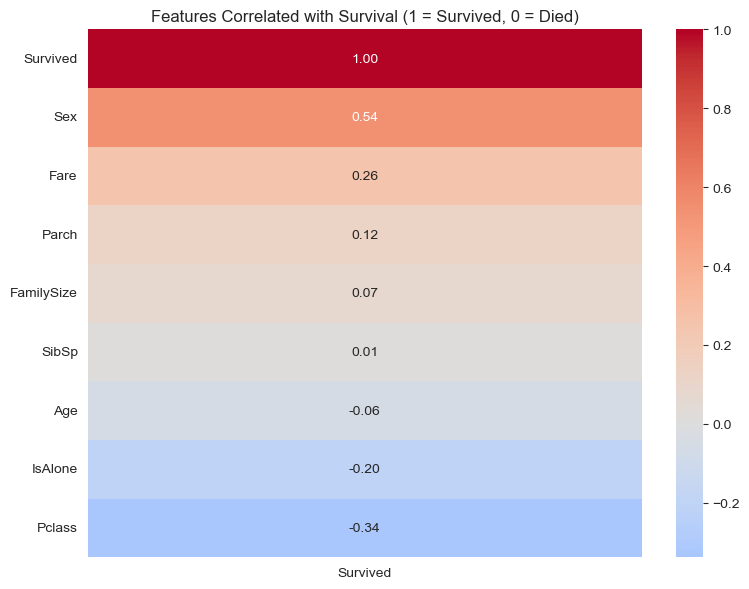

In [18]:
#6. Correlation Analysis


# First ensure we have a numeric 'Survived' column for correlation
titanic_corr = titanic.copy()

# If 'Survived' contains strings, convert to numeric (0/1)
if titanic_corr['Survived'].dtype == object:
    titanic_corr['Survived'] = titanic_corr['Survived'].map({'Died': 0, 'Survived': 1})

# Calculate correlation matrix - ensure 'Survived' is included
numeric_cols = titanic_corr.select_dtypes(include=['number']).columns
corr_matrix = titanic_corr[numeric_cols].corr()

# Plot full correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Titanic Features')
plt.tight_layout()
plt.show()

# Plot survival correlation focused view
plt.figure(figsize=(8, 6))
if 'Survived' in corr_matrix.columns:
    survival_corr = corr_matrix[['Survived']].sort_values('Survived', ascending=False)
    sns.heatmap(survival_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Features Correlated with Survival (1 = Survived, 0 = Died)')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'Survived' column not available for correlation analysis")

In [19]:
#7. Key Insights and Conclusions


#Key Findings:



#Gender Impact: Females had a significantly higher survival rate (74.2%) compared to males (18.9%).

#Passenger Class:

#1st class passengers had the highest survival rate (62.9%)

#2nd class: 47.3%

#3rd class: only 24.2%

#Age Groups:

#Children (0-12 years) had the highest survival rate among age groups

#Survival rates decreased with age until senior years

#Family Size:

#Passengers traveling alone had lower survival rates

#Medium family sizes (2-4 members) had better survival chances

#Fare:

#Higher fare groups correlated with higher survival rates



#Embarkation Port:


#Passengers from Cherbourg (C) had the highest survival rate



#Most Important Features:

#Gender (most significant)

#Passenger Class

#Fare

#Age

#Family Size
